In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import os
import time
import pandas as pd
from scipy import stats

In [15]:
DATASET_PATH='..\..\dataset\preprocesd_cicids.csv'
print(DATASET_PATH)

..\..\dataset\preprocesd_cicids.csv


In [16]:
# ,nrows=10000, header=0
start = time.time()
df=pd.read_csv(DATASET_PATH)
df.head()
print("Time taken to load the data: ", time.time()-start," seconds")

Time taken to load the data:  16.126770734786987  seconds


In [17]:
df.shape

(2520798, 79)

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [20]:
df.drop(corr_features,axis=1,inplace=True)

In [21]:
df.shape

(2520798, 44)

In [22]:
# create a Series with the count of rows in each group
label_counts = df[' Label'].value_counts()

# create a list of labels that have less than 10,000 rows
labels_to_merge = label_counts[label_counts < 3000].index.tolist()
print(labels_to_merge)

['Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']


In [23]:
# create a new label called 'Other' and merge the labels with less than 10,000 rows
df[' Label'] = df[' Label'].apply(lambda x: 'Other' if x in labels_to_merge else x)
# group the rows by the new 'Label' column
grouped_df = df.groupby(' Label')

In [24]:
df.shape

(2520798, 44)

In [25]:
df[' Label'].value_counts()

 Label
BENIGN              2095057
DoS Hulk             172846
DDoS                 128014
PortScan              90694
DoS GoldenEye         10286
FTP-Patator            5931
DoS slowloris          5385
DoS Slowhttptest       5228
Other                  4138
SSH-Patator            3219
Name: count, dtype: int64

In [26]:
# Count the number of instances for each class
class_counts = df[' Label'].value_counts()
print(class_counts)

 Label
BENIGN              2095057
DoS Hulk             172846
DDoS                 128014
PortScan              90694
DoS GoldenEye         10286
FTP-Patator            5931
DoS slowloris          5385
DoS Slowhttptest       5228
Other                  4138
SSH-Patator            3219
Name: count, dtype: int64


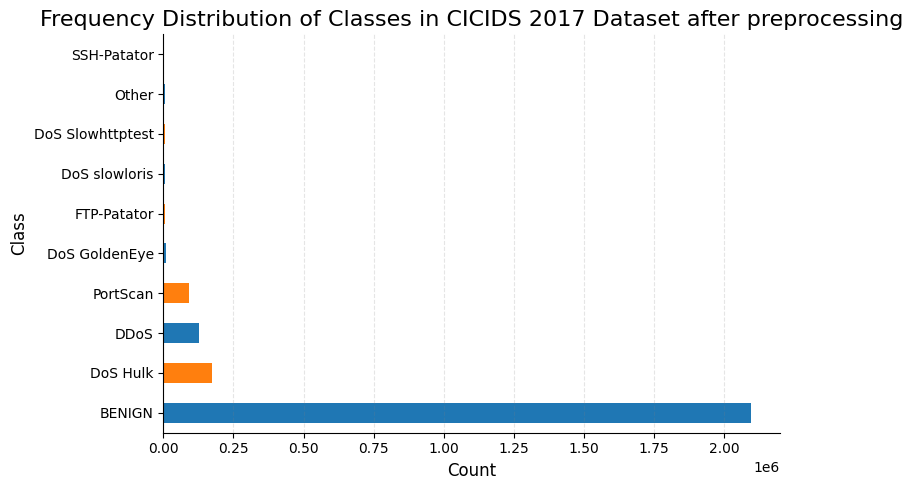

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a horizontal bar plot of the frequency distribution of classes
fig, ax = plt.subplots(figsize=(8, 5))
class_counts.plot(kind='barh', color=['#1f77b4', '#ff7f0e'])
ax.set_title('Frequency Distribution of Classes in CICIDS 2017 Dataset after preprocessing', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Class', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.2)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(' Label', axis=1), df[' Label'], test_size=0.30, random_state=0)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9984608060933037


In [29]:
df.shape

(2520798, 44)

In [30]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [31]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4000000.00,666666.700,...,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,110091.74,18348.623,...,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,230769.23,38461.540,...,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,352941.20,58823.530,...,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4000000.00,666666.700,...,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [32]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)
# Xn.value_counts()

In [34]:
Xn.shape

(32190, 43)

In [35]:
yn.shape

(32190,)

In [36]:
Xn.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
1029337,53,62874,4,116,29,29,93,93,4803.257300,95.428955,...,0,0,0,0,-1,-1,0.00,0.000,0,0.000
2454275,57225,86,1,0,0,0,0,0,0.000000,23255.814000,...,0,0,0,0,905,229,0.00,0.000,0,0.000
440854,80,116003861,16,440,356,0,340,0,7.344583,0.258612,...,0,0,0,0,8192,4736,46441.09,31255.098,140678,14892.001
438438,443,5683083,8,397,216,0,1460,0,723.726870,2.463452,...,0,0,0,0,8192,119,269399.00,0.000,269399,0.000
2307425,53,23652,1,48,48,48,128,128,7441.231000,84.559450,...,0,0,0,0,-1,-1,0.00,0.000,0,0.000


In [37]:
yn.value_counts()

 Label
BENIGN              3219
DDoS                3219
DoS GoldenEye       3219
DoS Hulk            3219
DoS Slowhttptest    3219
DoS slowloris       3219
FTP-Patator         3219
Other               3219
PortScan            3219
SSH-Patator         3219
Name: count, dtype: int64

In [38]:
#z-score   z = (x - mean) / std
# it can make it easier for the algorithm to learn meaningful patterns in the data
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [39]:
Xn.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
1029337,-0.263616,-0.707781,-0.069969,-0.037641,-0.278349,0.352479,-0.530286,2.687514,-0.022664,-0.158127,...,NaN,NaN,NaN,NaN,-1.116079,-0.276731,-0.332643,-0.198419,-0.342221,-0.280617
2454275,5.566419,-0.709415,-0.120401,-0.042799,-0.324996,-0.115027,-0.563196,-0.188982,-0.023023,0.067566,...,NaN,NaN,NaN,NaN,-1.052714,-0.244825,-0.332643,-0.198419,-0.342221,-0.280617
440854,-0.260863,2.309030,0.131756,-0.023235,0.247642,-0.115027,-0.442882,-0.188982,-0.023022,-0.159054,...,NaN,NaN,NaN,NaN,-0.543073,0.380396,-0.306772,-0.168252,-0.277858,-0.278543
438438,-0.223847,-0.561542,-0.002728,-0.025147,0.022447,-0.115027,-0.046554,-0.188982,-0.022969,-0.159033,...,NaN,NaN,NaN,NaN,-0.543073,-0.260084,-0.182565,-0.198419,-0.218966,-0.280617
2307425,-0.263616,-0.708802,-0.120401,-0.040664,-0.247787,0.658776,-0.517901,3.770066,-0.022467,-0.158233,...,NaN,NaN,NaN,NaN,-1.116079,-0.276731,-0.332643,-0.198419,-0.342221,-0.280617


In [40]:
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [41]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean', keep_empty_features=True)

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier as RFC

# model training USING RFC
start = time.time()
Random_Forest = RFC(max_depth=40)
Random_Forest.fit(X_train, Y_train)
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  5.267598390579224  seconds


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# performance metrics calculation of our model over training data set

start = time.time()
Predict_X =  Random_Forest.predict(X_train)
scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X, digits=3)
print("Time taken to for performance matric calculation: ", time.time()-start," seconds")

Time taken to for performance matric calculation:  28.01113510131836  seconds


In [45]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9949407535614432

Model Accuracy:
 0.9997781032263791

Confusion matrix:
 [[2255    0    0    0    0    0    0    5    0    0]
 [   0 2283    0    0    0    0    0    0    0    0]
 [   0    0 2252    0    0    0    0    0    0    0]
 [   0    0    0 2278    0    0    0    0    0    0]
 [   0    0    0    0 2262    0    0    0    0    0]
 [   0    0    0    0    0 2267    0    0    0    0]
 [   0    0    0    0    0    0 2194    0    0    0]
 [   0    0    0    0    0    0    0 2256    0    0]
 [   0    0    0    0    0    0    0    0 2236    0]
 [   0    0    0    0    0    0    0    0    0 2245]]

Classification report:
                   precision    recall  f1-score   support

          BENIGN      1.000     0.998     0.999      2260
            DDoS      1.000     1.000     1.000      2283
   DoS GoldenEye      1.000     1.000     1.000      2252
        DoS Hulk      1.000     1.

In [46]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

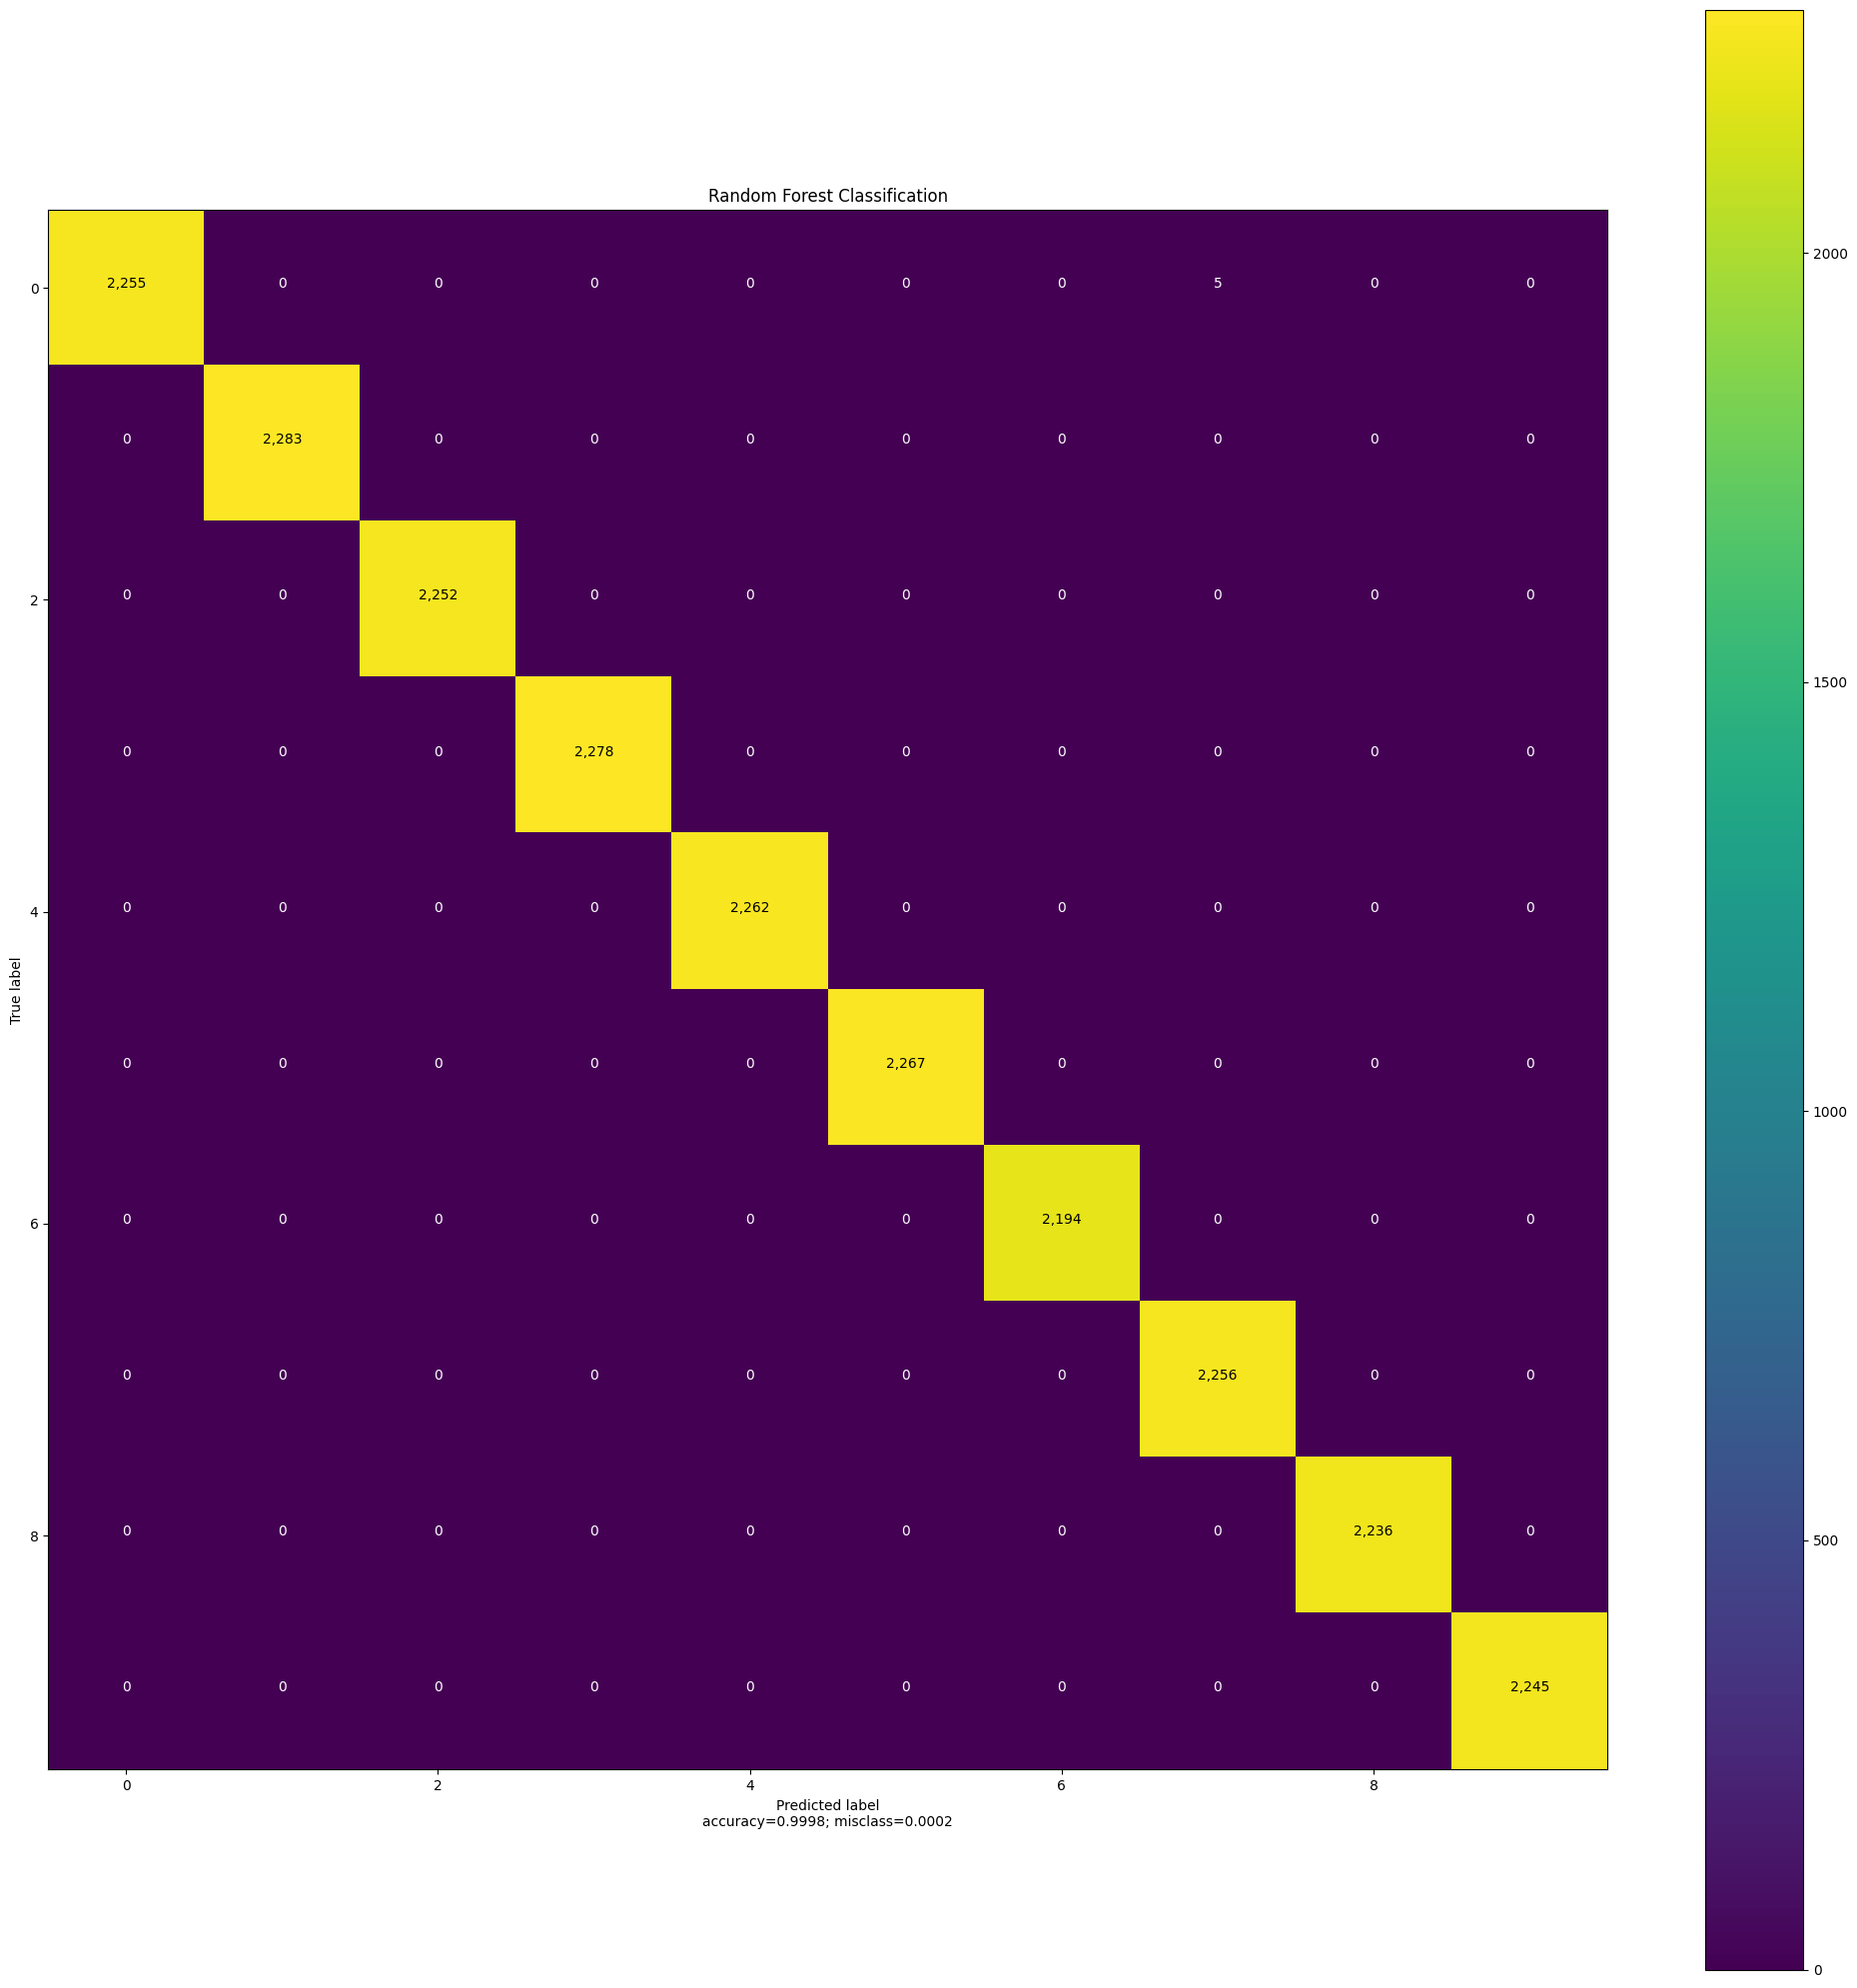

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [48]:
# performance metrics calculation of our model over test data set
start = time.time()
Predict_X =  Random_Forest.predict(X_test)
scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X, digits=3)
print("Time taken to for performance matric calculation: ", time.time()-start," seconds")

Time taken to for performance matric calculation:  11.690965175628662  seconds


In [49]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification)
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9924408871913365

Model Accuracy:
 0.9945117531324428

Confusion matrix:
 [[ 943    0    0    2    1    1    0   11    1    0]
 [   2  934    0    0    0    0    0    0    0    0]
 [   0    0  967    0    0    0    0    0    0    0]
 [   3    0    1  937    0    0    0    0    0    0]
 [   3    0    0    0  947    5    0    2    0    0]
 [   2    0    0    0    1  947    0    2    0    0]
 [   0    0    0    0    0    0 1025    0    0    0]
 [   9    0    3    1    0    0    0  950    0    0]
 [   0    2    0    1    0    0    0    0  980    0]
 [   0    0    0    0    0    0    0    0    0  974]]

Classification report:
                   precision    recall  f1-score   support

          BENIGN      0.980     0.983     0.982       959
            DDoS      0.998     0.998     0.998       936
   DoS GoldenEye      0.996     1.000     0.998       967
        DoS Hulk      0.996     0.

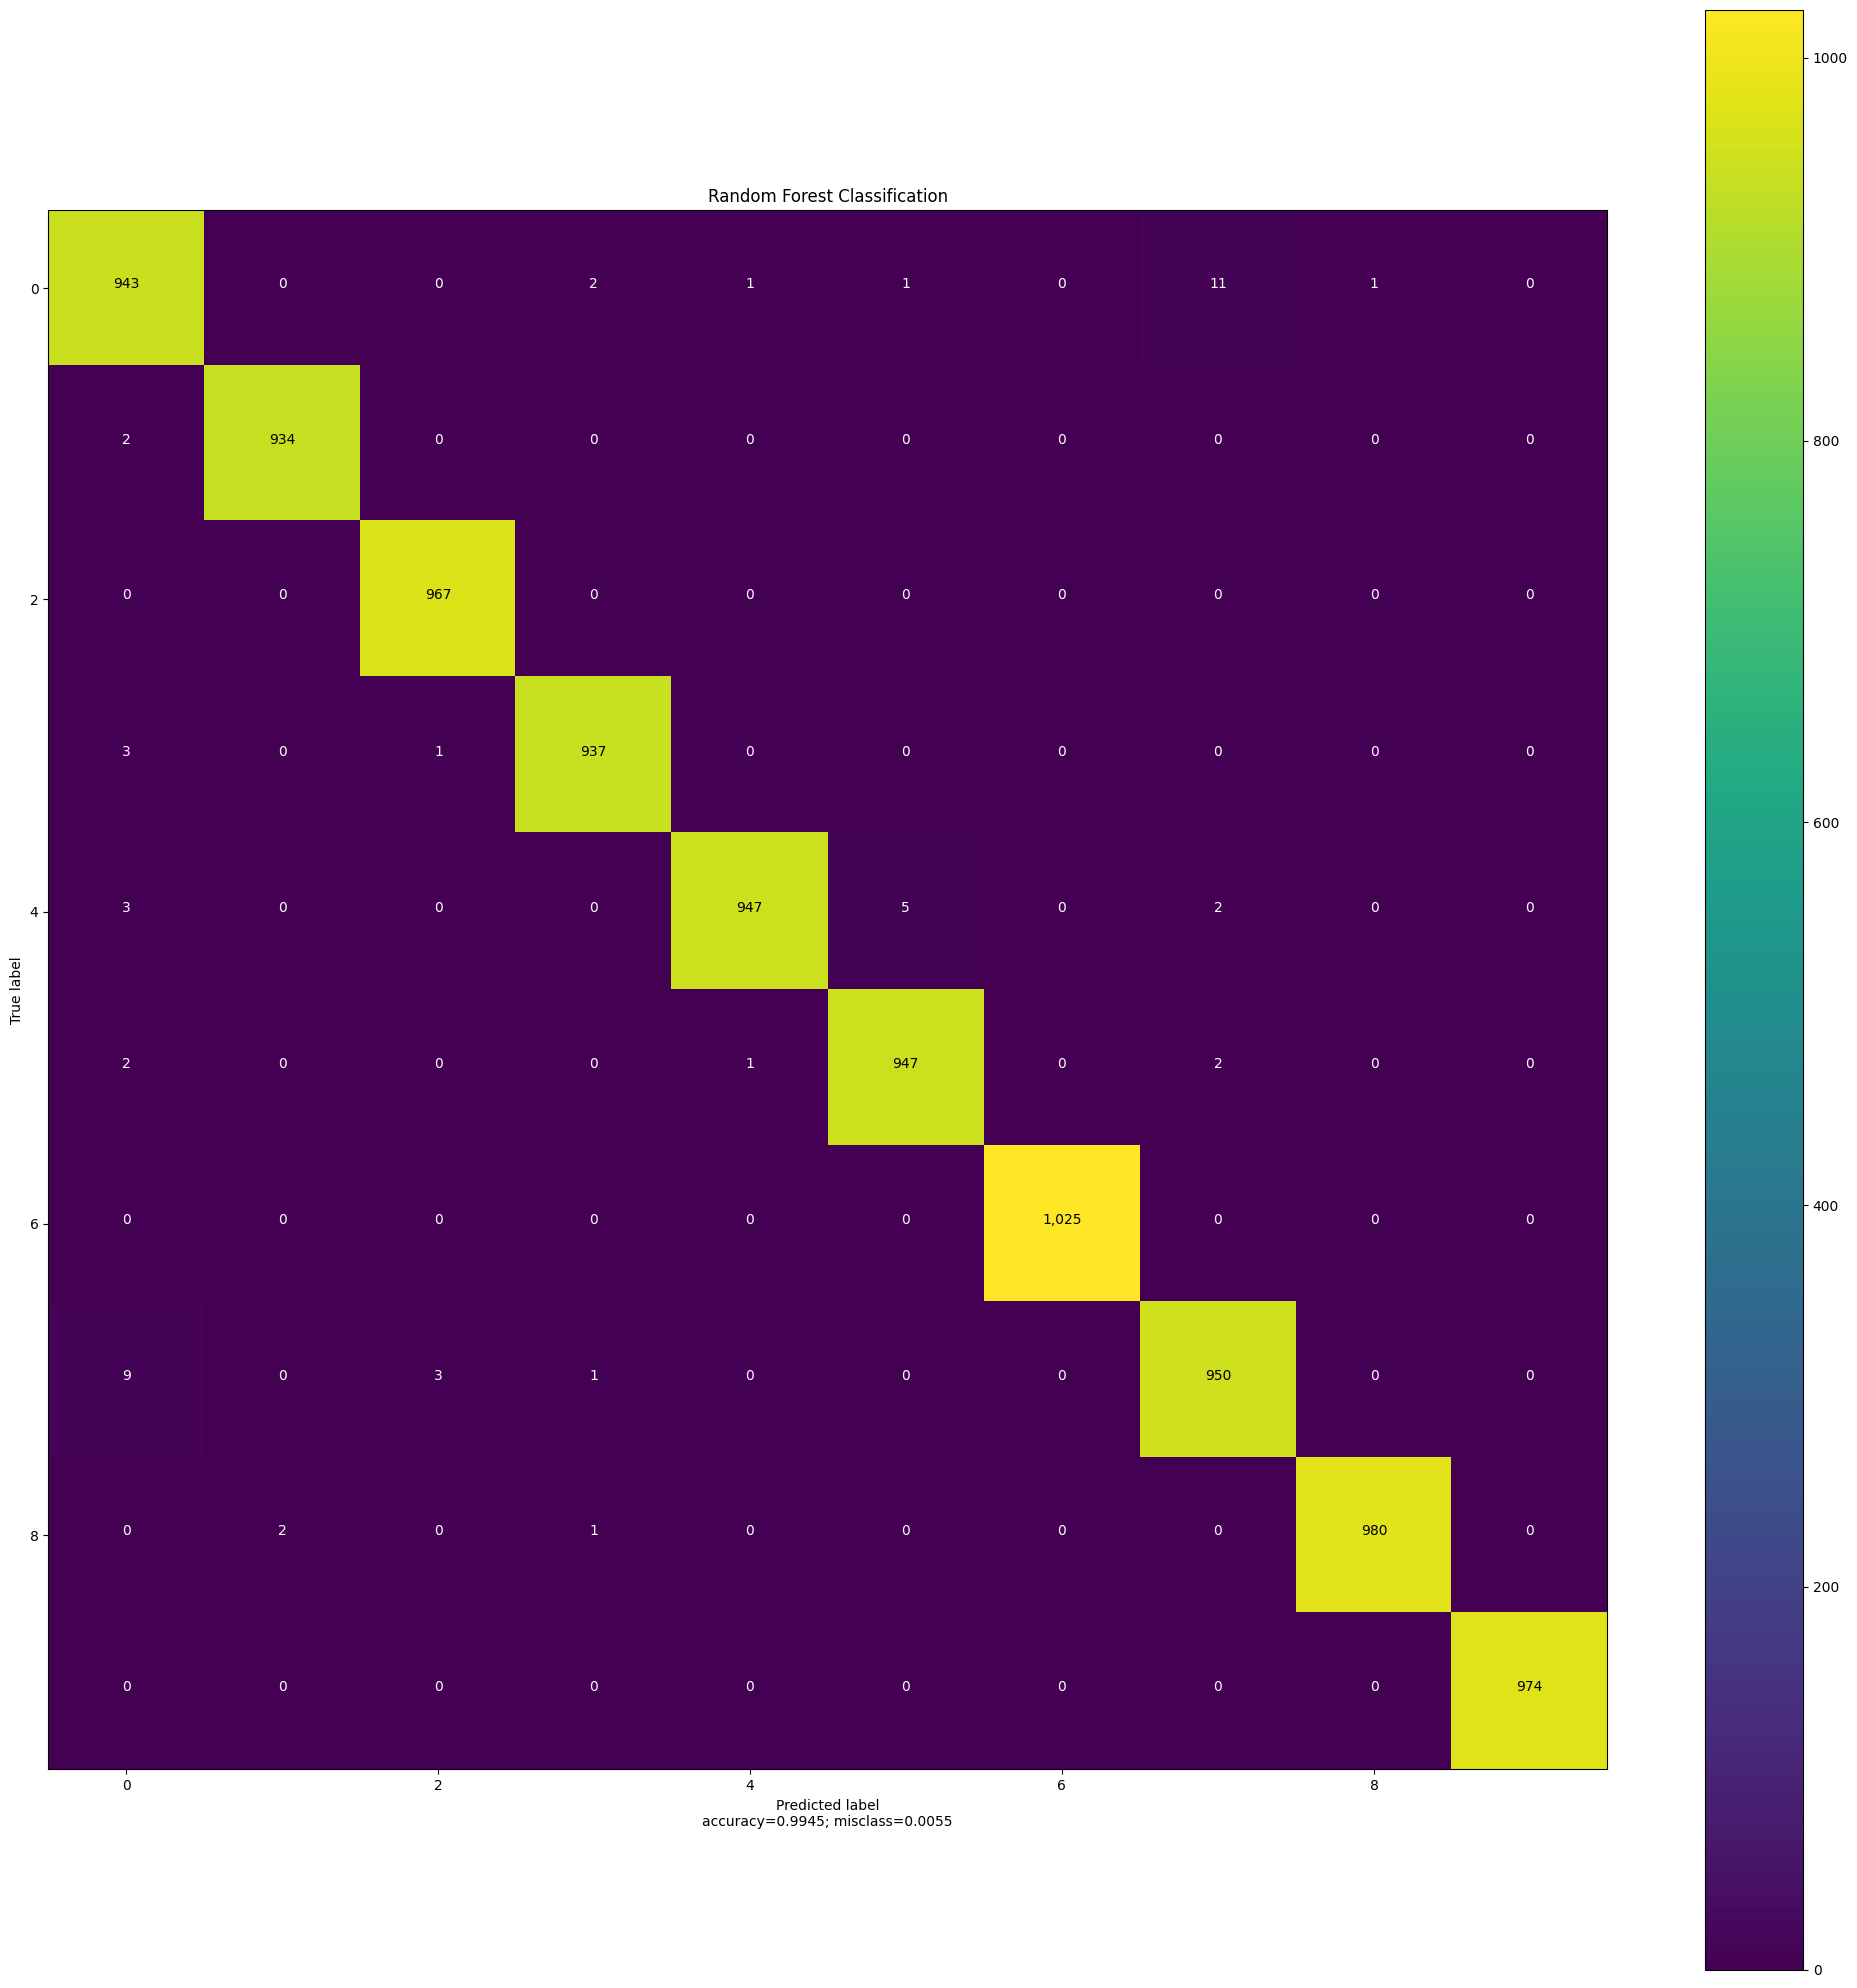

<Figure size 640x480 with 0 Axes>

In [50]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [51]:
X_test

array([[-0.26771718, -0.40193748,  0.19838519, ..., -0.19865581,
        -0.34485315, -0.28169172],
       [-0.26771718, -0.41005021,  0.19838519, ..., -0.19865581,
        -0.34485315, -0.28169172],
       [-0.26186951,  2.03261081,  0.12035955, ...,  6.23852219,
         3.96655621,  2.30725884],
       ...,
       [-0.26186951, -0.70526631, -0.0825071 , ..., -0.19865581,
        -0.34485315, -0.28169172],
       [-0.26186951, -0.67460258, -0.0825071 , ..., -0.19865581,
        -0.34485315, -0.28169172],
       [-0.26186951, -0.46409063, -0.05129684, ..., -0.19865581,
        -0.34211145, -0.28169172]])

In [52]:
from joblib import dump, load

# Save the model
dump(Random_Forest, 'random_forest_model.joblib')

# To load the model later, use:
# Random_Forest = load('random_forest_model.joblib')


['random_forest_model.joblib']